In [1]:

import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from scipy import ndimage
import cv2
import random
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Convolution Examples**

In [ ]:
data1 = np.array([
   [3, 0, 1, 2, 7, 4],
   [1, 5, 8, 9, 3, 1],
   [2, 7, 2, 5, 1, 3],
   [0, 1, 3, 1, 7, 8],
   [4, 2, 1, 6, 2, 8],
   [2, 4, 5, 2, 3, 9]])

data2 = np.array([
   [10, 10, 10, 0, 0, 0],
   [10, 10, 10, 0, 0, 0],
   [10, 10, 10, 0, 0, 0],
   [10, 10, 10, 0, 0, 0],
   [10, 10, 10, 0, 0, 0],
   [10, 10, 10, 0, 0, 0]])

kernel = np.array([
   [1,0,-1],
   [1,0,-1],
   [1,0,-1]])


In [ ]:
res1 = ndimage.convolve(data1, kernel)
print(res1)

res2 = ndimage.convolve(data2, kernel)
print(res2)


[[-2  3  8  7 -4 -8]
 [ 6  5  4  0 -8 -3]
 [10 10  2 -2 -3  1]
 [ 4  0  2  4  7  9]
 [ 1  3  2  3 16 13]
 [ 2  3  0 -3 16 18]]
[[  0   0 -30 -30   0   0]
 [  0   0 -30 -30   0   0]
 [  0   0 -30 -30   0   0]
 [  0   0 -30 -30   0   0]
 [  0   0 -30 -30   0   0]
 [  0   0 -30 -30   0   0]]


# **Image Processing using Convolution**

## Load Image Data

Images are 2D arrays of pixel values. A grayscale image consists of 1 value (0-255) at each (x,y) location. A color image consistes of 3 channels R,G,B. Hence, there are 3 values (0-255) at each location (x,y).

In [ ]:
basePath = "/content/drive/My Drive/Colab Notebooks/"

img = cv2.imread(basePath + 'utsa-npb.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img)


[[[119 174 228]
  [119 174 228]
  [119 174 228]
  ...
  [ 40  96 170]
  [ 39  95 169]
  [ 39  95 169]]

 [[119 174 228]
  [119 174 228]
  [119 174 228]
  ...
  [ 40  96 170]
  [ 40  96 170]
  [ 40  96 170]]

 [[119 174 228]
  [119 174 228]
  [119 174 228]
  ...
  [ 40  96 170]
  [ 40  96 170]
  [ 40  96 170]]

 ...

 [[170 163 157]
  [170 163 157]
  [170 163 157]
  ...
  [ 87  99  37]
  [ 87  99  37]
  [ 76  88  26]]

 [[183 176 170]
  [182 175 169]
  [180 173 167]
  ...
  [ 82  96  35]
  [ 82  96  35]
  [ 86 100  39]]

 [[183 176 170]
  [182 175 169]
  [180 173 167]
  ...
  [ 82  96  35]
  [ 82  96  35]
  [ 86 100  39]]]


## Convolution Kernels

An image kernel is a small matrix used to apply effects of images. Kernels can be of different sizes 3x3, 5x5, 7x7 - generally odd numbers and square matrices. Following code shows a few kernels and the implementation of those on an image of the UTSA NPB building. You can also view some other kernel examples [here](https://setosa.io/ev/image-kernels/). 

In [ ]:
kernel0 = (1/16)*np.array([
   [1,2,1],
   [2,4,2],
   [1,2,1]])

kernel1 = (1/9)*np.array([
   [1,1,1],
   [1,1,1],
   [1,1,1]])

kernel2 = (1/3)*np.array([
   [0,0,0],
   [1,1,1],
   [0,0,0]])

kernel3 = (1/3)*np.array([
   [0,1,0],
   [0,1,0],
   [0,1,0]])

kernel4 = np.array([
   [1,0,-1],
   [1,0,-1],
   [1,0,-1]])

kernel5 = np.array([
   [1,1,1],
   [0,0,0],
   [-1,-1,-1]])

kernel6 = np.array([
   [0,-1,0],
   [-1,4,-1],
   [0,-1,0]])

kernel7 = np.array([
   [-1,-1,-1],
   [-1,8,-1],
   [-1,-1,-1]])

kernel8 = np.array([
   [0,-1,0],
   [-1,5,-1],
   [0,-1,0]])

kernel9 = np.array([
   [-2,-1,0],
   [-1,1,1],
   [0,1,2]])

out0 = cv2.filter2D(img, -1, kernel0)
out1 = cv2.filter2D(img, -1, kernel1)
out2 = cv2.filter2D(img, -1, kernel2)
out3 = cv2.filter2D(img, -1, kernel3)
out4 = cv2.filter2D(img, -1, kernel4)
out5 = cv2.filter2D(img, -1, kernel5)
out6 = cv2.filter2D(img, -1, kernel6)
out7 = cv2.filter2D(img, -1, kernel7)
out8 = cv2.filter2D(out0, -1, kernel8)
out9 = cv2.filter2D(img, -1, kernel9)


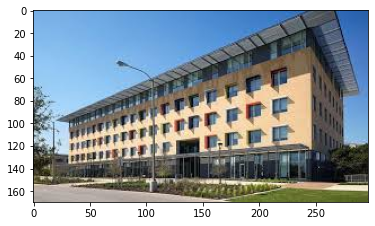

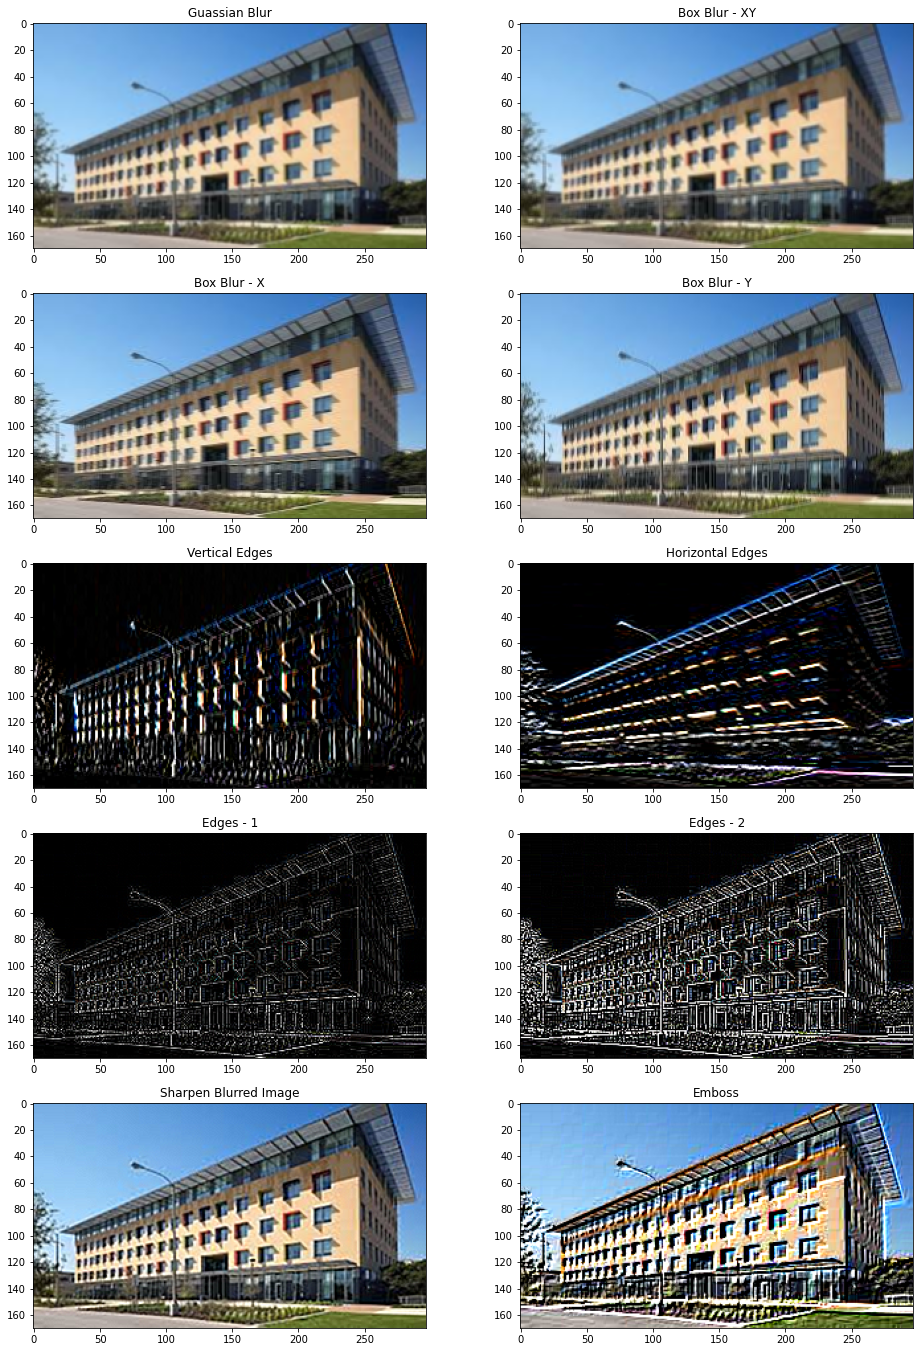

In [ ]:
plt.imshow(img)
plt.show()

plt.figure(figsize=(16,24))
plt.subplot(521), plt.imshow(out0), plt.title('Guassian Blur')
plt.subplot(522), plt.imshow(out1), plt.title('Box Blur - XY')
plt.subplot(523), plt.imshow(out2), plt.title('Box Blur - X')
plt.subplot(524), plt.imshow(out3), plt.title('Box Blur - Y')
plt.subplot(525), plt.imshow(out4), plt.title('Vertical Edges')
plt.subplot(526), plt.imshow(out5), plt.title('Horizontal Edges')
plt.subplot(527), plt.imshow(out6), plt.title('Edges - 1')
plt.subplot(528), plt.imshow(out7), plt.title('Edges - 2')
plt.subplot(529), plt.imshow(out8), plt.title('Sharpen Blurred Image')
plt.subplot(5,2,10), plt.imshow(out9), plt.title('Emboss')
plt.show()


# **MNIST Dataset**

## Load, clean and prepare data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#x_train, y_train = tfds.as_numpy(tfds.load('mnist', as_supervised=True, split='train', batch_size=-1))
#x_test, y_test = tfds.as_numpy(tfds.load('mnist', as_supervised=True, split='test', batch_size=-1))


11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
(10000, 28, 28)
10


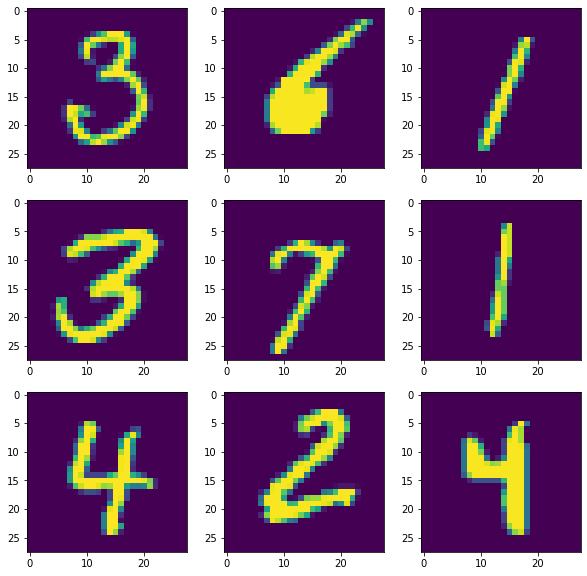

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1), plt.imshow(random.choice(x_train))

print(x_train.shape)
print(x_test.shape)
print(len(np.unique(y_train)))


## Build the model

In [10]:
def create_model():
    model = keras.Sequential([
                                keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', 
                                                    input_shape=(x_train.shape[1], x_train.shape[2], 1)),
                                keras.layers.MaxPooling2D(pool_size=(2,2)),
                                keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                                keras.layers.MaxPooling2D(pool_size=(2,2)),
                                keras.layers.Flatten(),
                                keras.layers.Dense(100, activation='relu'),
                                keras.layers.Dense(len(np.unique(y_train)), activation='softmax')
                                ])
    model.compile(
        optimizer='SGD',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
        )
    return model

mnist_model = create_model()
print(mnist_model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               160100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Train the model - fit the training data

In [11]:
cp_callback = keras.callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/mnist/",
                                                 save_weights_only=True,
                                                 verbose=1)

In [12]:
x_train_r = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test_r = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [14]:
mnist_model.fit(x_train_r, y_train, epochs=10, batch_size=50, callbacks=[cp_callback])

Epoch 1/10
1200/1200 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.7997
Epoch 00001: saving model to /content/drive/My Drive/Colab Notebooks/mnist/
1200/1200 [==============================] - 7s 6ms/step - loss: 0.6913 - accuracy: 0.7997
Epoch 2/10
1199/1200 [============================>.] - ETA: 0s - loss: 0.1940 - accuracy: 0.9421
Epoch 00002: saving model to /content/drive/My Drive/Colab Notebooks/mnist/
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1940 - accuracy: 0.9421
Epoch 3/10
1199/1200 [============================>.] - ETA: 0s - loss: 0.1319 - accuracy: 0.9609
Epoch 00003: saving model to /content/drive/My Drive/Colab Notebooks/mnist/
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1318 - accuracy: 0.9609
Epoch 4/10
1192/1200 [============================>.] - ETA: 0s - loss: 0.1043 - accuracy: 0.9681
Epoch 00004: saving model to /content/drive/My Drive/Colab Notebooks/mnist/
1200/1200 [====================

## Evaluate the model

In [15]:
mnist_model = create_model()

mnist_model.load_weights('/content/drive/My Drive/Colab Notebooks/mnist/')


In [16]:
mnist_model.evaluate(x_test_r,y_test,batch_size=1)

10000/10000 [==============================] - 21s 2ms/step - loss: 0.0488 - accuracy: 0.9850


[0.04875251650810242, 0.9850000143051147]

# Data Augmentation

In [17]:
def visualize(original, augmented):
    idx = random.randrange(0, original.shape[0])
    augmented = augmented.numpy()
    augmented = augmented.reshape(augmented.shape[0], augmented.shape[1], augmented.shape[2])

    plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original[idx])

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented[idx])


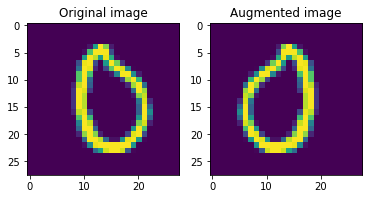

In [18]:
flipped_lr = tf.image.flip_left_right(x_train_r)
visualize(x_train, flipped_lr)


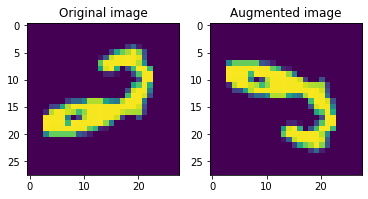

In [19]:
flipped_ud = tf.image.flip_up_down(x_train_r)
visualize(x_train, flipped_ud)


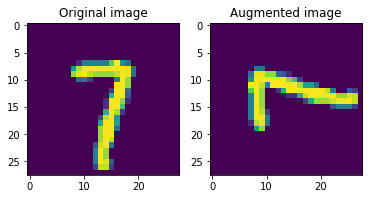

In [20]:
rotated = tf.image.rot90(x_train_r, 1)
visualize(x_train, rotated)


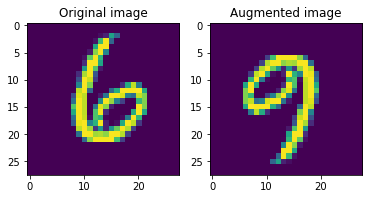

In [16]:
rotated = tf.image.rot90(x_train_r, 2)
visualize(x_train, rotated)


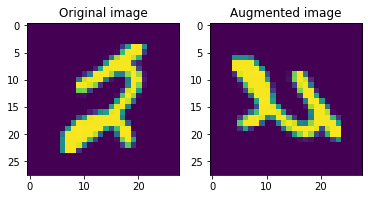

In [17]:
rotated = tf.image.rot90(x_train_r, 3)
visualize(x_train, rotated)


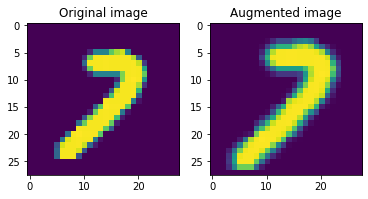

In [18]:
cropped = tf.image.central_crop(x_train_r, central_fraction=0.8)
cropped = tf.image.resize(cropped, [x_train.shape[1], x_train.shape[2]])
visualize(x_train, cropped)
